# **Importing library necessairy**

In [175]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# **Load dataset**

In [176]:
data=pd.read_csv('/content/drive/MyDrive/nearest-earth-objects(1910-2024).csv')
data.head()

,neo_id,name,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,orbiting_body,relative_velocity,miss_distance,is_hazardous
0,2162117,162117 (1998 SD15),19.14,0.394962,0.883161,Earth,71745.401048,5.814362e+07,False
1,2349507,349507 (2008 QY),18.50,0.530341,1.185878,Earth,109949.757148,5.580105e+07,True
2,2455415,455415 (2003 GA),21.45,0.136319,0.304818,Earth,24865.506798,6.720689e+07,False
3,3132126,(2002 PB),20.63,0.198863,0.444672,Earth,78890.076805,3.039644e+07,False
4,3557844,(2011 DW),22.70,0.076658,0.171412,Earth,56036.519484,6.311863e+07,False


In [177]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338199 entries, 0 to 338198
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   neo_id                  338199 non-null  int64  
 1   name                    338199 non-null  object 
 2   absolute_magnitude      338171 non-null  float64
 3   estimated_diameter_min  338171 non-null  float64
 4   estimated_diameter_max  338171 non-null  float64
 5   orbiting_body           338199 non-null  object 
 6   relative_velocity       338199 non-null  float64
 7   miss_distance           338199 non-null  float64
 8   is_hazardous            338199 non-null  bool   
dtypes: bool(1), float64(5), int64(1), object(2)
memory usage: 21.0+ MB


In [178]:
data.shape

(338199, 9)

# **Handling Missing Data**

In [179]:
data.isnull().sum()

,0
neo_id,0
name,0
absolute_magnitude,28
estimated_diameter_min,28
estimated_diameter_max,28
orbiting_body,0
relative_velocity,0
miss_distance,0
is_hazardous,0


In [180]:
#remove missing values beacause not util
data.dropna(inplace=True)

In [181]:
data.duplicated().sum()

0

# **Data Reduction**

In [182]:
#remove neo_id and name columns from data
data=data.drop(['neo_id','name'], axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 338171 entries, 0 to 338198
Data columns (total 7 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   absolute_magnitude      338171 non-null  float64
 1   estimated_diameter_min  338171 non-null  float64
 2   estimated_diameter_max  338171 non-null  float64
 3   orbiting_body           338171 non-null  object 
 4   relative_velocity       338171 non-null  float64
 5   miss_distance           338171 non-null  float64
 6   is_hazardous            338171 non-null  bool   
dtypes: bool(1), float64(5), object(1)
memory usage: 18.4+ MB


# **EDA**

In [183]:
data.describe()

,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,relative_velocity,miss_distance
count,338171.000000,338171.000000,338171.000000,338171.000000,3.381710e+05
mean,22.932525,0.157812,0.352878,51060.017994,4.153547e+07
std,2.911216,0.313885,0.701869,26399.922830,2.077411e+07
min,9.250000,0.000511,0.001143,203.346433,6.745533e+03
25%,20.740000,0.025384,0.056760,30710.626399,2.494495e+07
50%,22.800000,0.073207,0.163697,47557.046397,4.332724e+07
75%,25.100000,0.189041,0.422708,66673.223798,5.933961e+07
max,33.580000,37.545248,83.953727,291781.106613,7.479865e+07


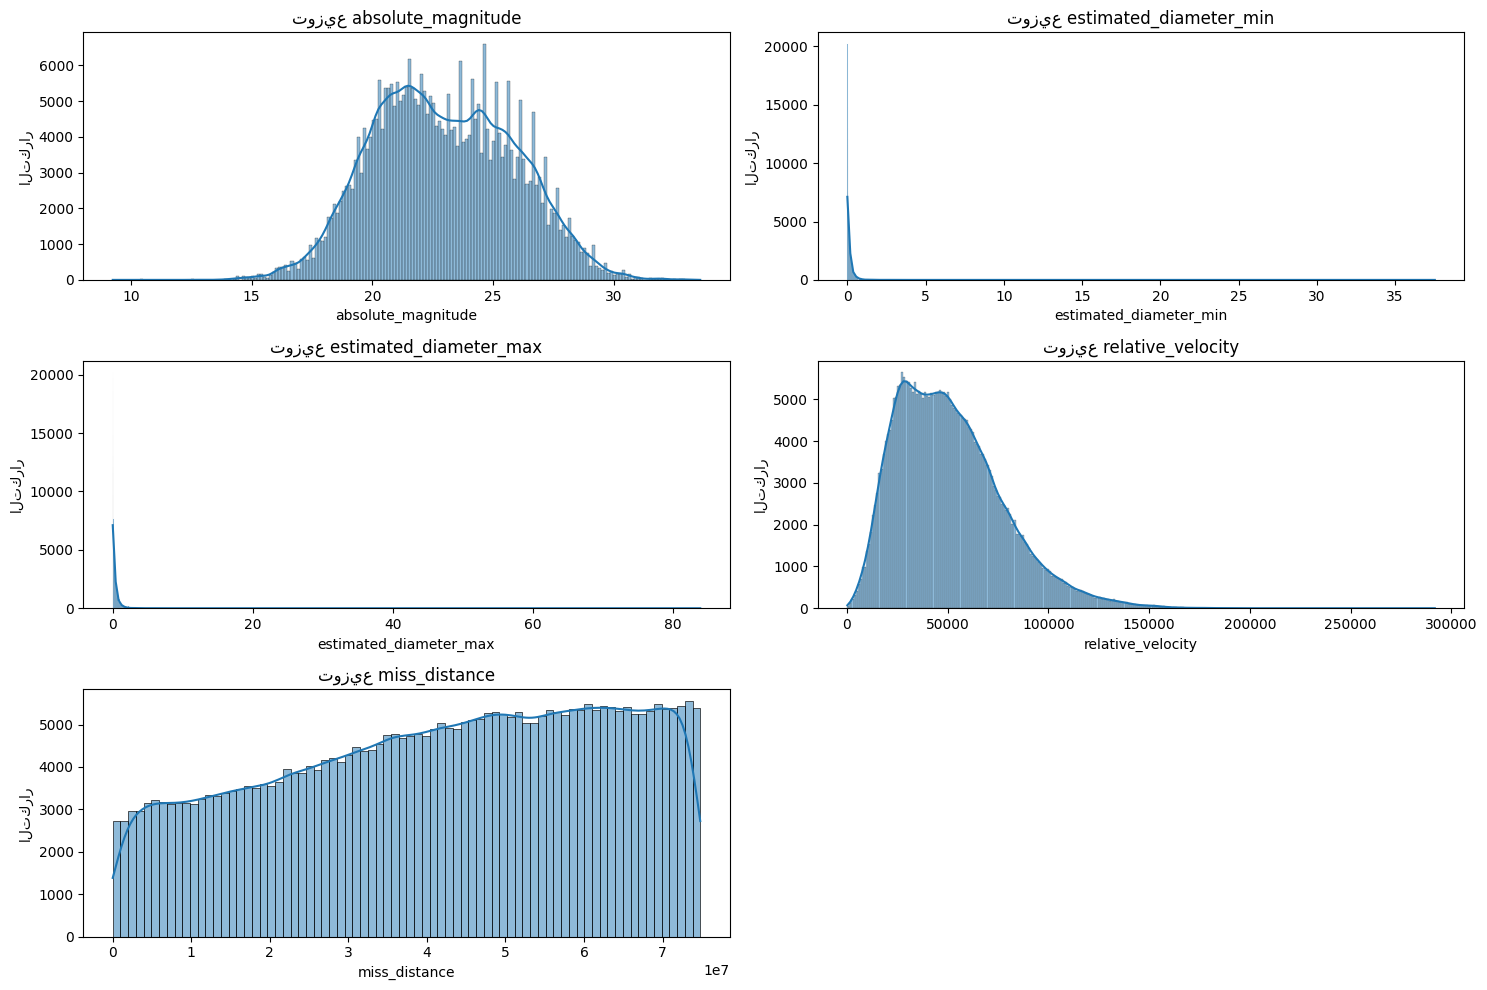

In [184]:
 # 3. تحليل المتغيرات الفردية
numeric_cols = data.select_dtypes(include=[np.number]).columns

    # إنشاء رسومات توزيع للمتغيرات الرقمية
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
  plt.subplot(3, 2, i)
  sns.histplot(data[col], kde=True)
  plt.title(f'توزيع {col}')
  plt.xlabel(col)
  plt.ylabel('التكرار')
plt.tight_layout()

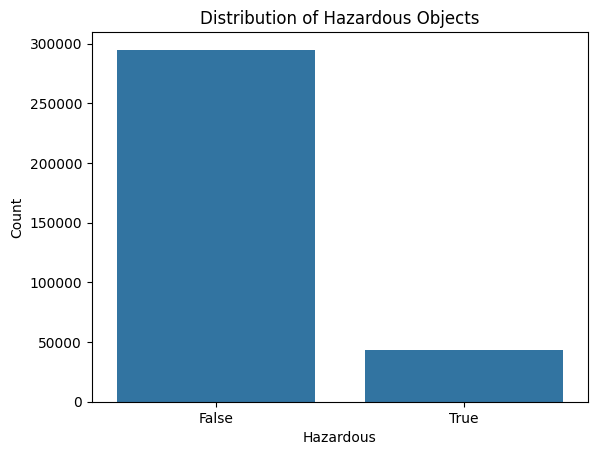

In [185]:
# Assuming 'hazardous' is the target variable you want to analyze
sns.countplot(x=data['is_hazardous'])
plt.title('Distribution of Hazardous Objects')
plt.xlabel('Hazardous')
plt.ylabel('Count')
plt.xticks([0, 1], ['False', 'True'])  # Adjust labels if necessary
plt.show()

In [186]:
from scipy import stats

# Calculate Z-scores for the features
z_scores = stats.zscore(data[numeric_cols])

# Find outliers based on Z-scores (absolute value greater than 3)
outliers = (abs(z_scores) > 3).any(axis=1)

# Show the rows of outliers
outlier_rows = data[outliers]
outlier_rows


,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,orbiting_body,relative_velocity,miss_distance,is_hazardous
13,16.710,1.209358,2.704207,Earth,12703.788572,6.958943e+07,False
93,16.640,1.248979,2.792801,Earth,24186.531186,4.182096e+07,False
124,19.090,0.404162,0.903733,Earth,139874.081716,5.526815e+07,True
133,22.310,0.091739,0.205135,Earth,151827.050327,7.158414e+07,False
170,15.910,1.748055,3.908769,Earth,46757.384332,4.668570e+07,False
...,...,...,...,...,...,...,...
337632,18.900,0.441118,0.986370,Earth,153110.514069,5.521540e+07,False
337683,19.331,0.361705,0.808798,Earth,150561.839319,4.314000e+07,False
337699,16.570,1.289897,2.884297,Earth,85945.015963,3.076702e+07,True
337782,16.410,1.388529,3.104845,Earth,61169.317915,5.255354e+07,False


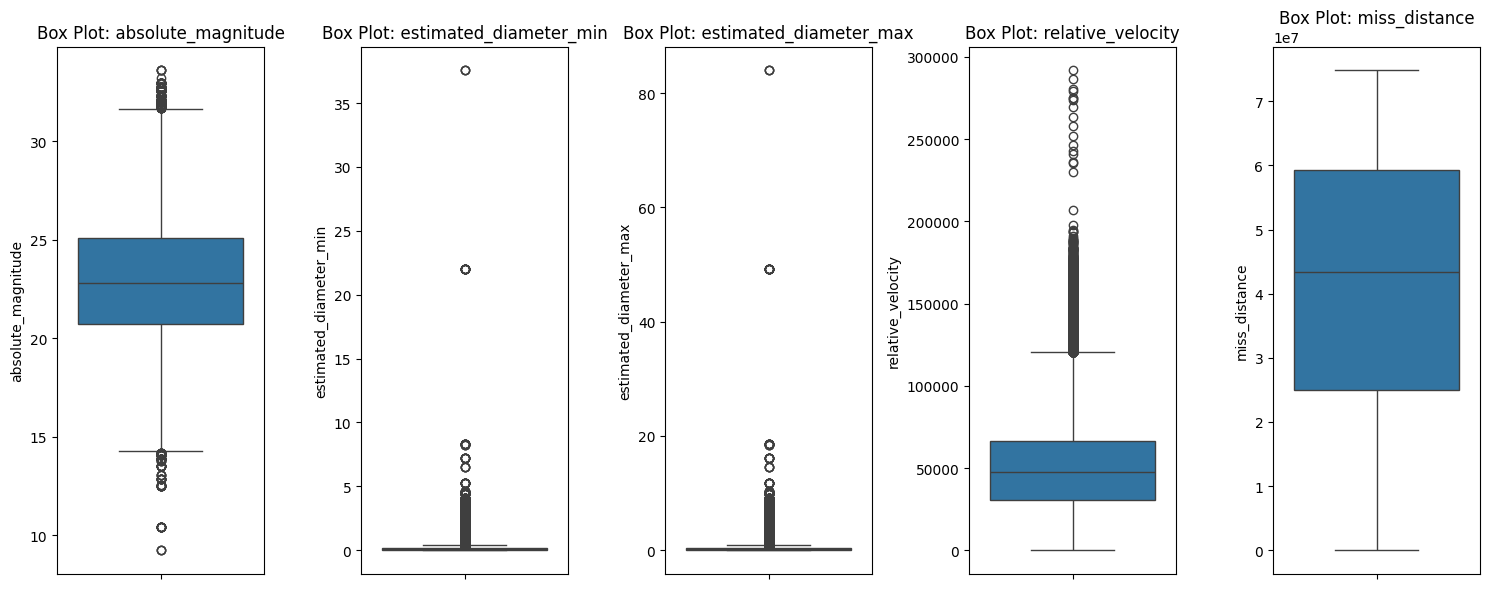

In [187]:
import matplotlib.pyplot as plt
import seaborn as sns

# قائمة بالأعمدة الرقمية التي سنرسمها
numeric_cols = ["absolute_magnitude", "estimated_diameter_min", "estimated_diameter_max",
                "relative_velocity", "miss_distance"]

# تحديد حجم المخطط
plt.figure(figsize=(15, 6))

# رسم مخططات الصندوق لكل عمود
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(1, len(numeric_cols), i)  # ترتيب الرسوم في صف واحد
    sns.boxplot(y=data[col])  # رسم المخطط للعمود
    plt.title(f"Box Plot: {col}")  # عنوان لكل مخطط

# تحسين ترتيب المخططات
plt.tight_layout()
plt.show()


In [188]:
data['orbiting_body'].value_counts()

,count
orbiting_body,
Earth,338171


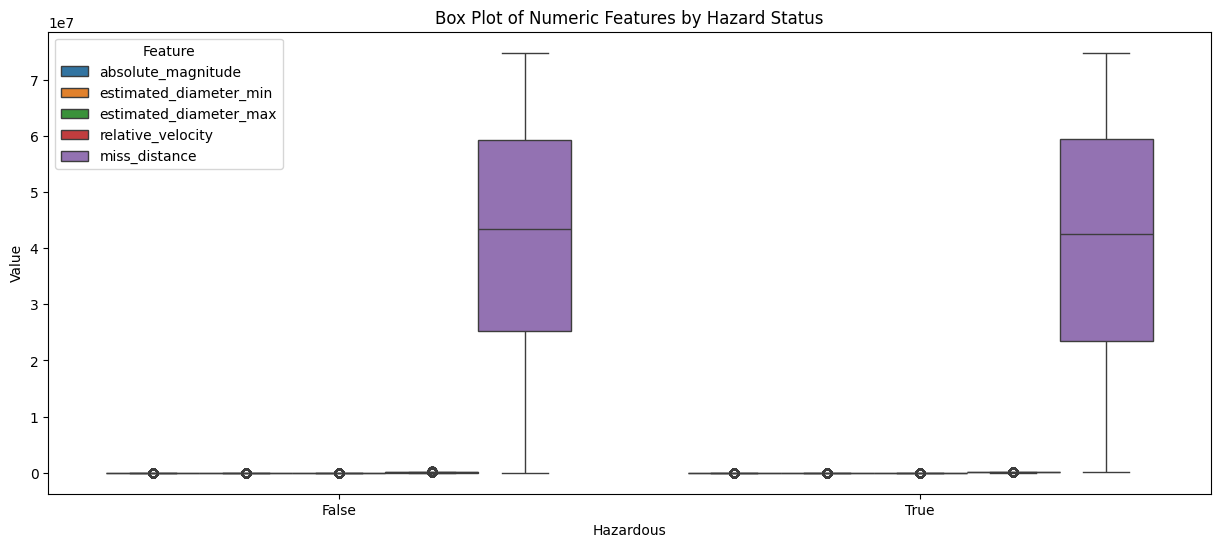

In [189]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data', 'numeric_cols', and 'is_hazardous' are defined

# Melt the DataFrame to create a long-form structure suitable for boxplot
melted_data = pd.melt(data, id_vars=['is_hazardous'], value_vars=numeric_cols,
                      var_name='Feature', value_name='Value')

# Create the box plot using the melted data
plt.figure(figsize=(15, 6))  # Adjust figsize as needed
sns.boxplot(x='is_hazardous', y='Value', hue='Feature', data=melted_data)
plt.title('Box Plot of Numeric Features by Hazard Status')
plt.xlabel('Hazardous')
plt.ylabel('Value')
plt.xticks([0, 1], ['False', 'True'])  # Adjust labels if necessary
plt.show()

# **Data Preprocessing:**


In [190]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
data['is_hazardous']=label_encoder.fit_transform(data['is_hazardous'])
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 338171 entries, 0 to 338198
Data columns (total 7 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   absolute_magnitude      338171 non-null  float64
 1   estimated_diameter_min  338171 non-null  float64
 2   estimated_diameter_max  338171 non-null  float64
 3   orbiting_body           338171 non-null  object 
 4   relative_velocity       338171 non-null  float64
 5   miss_distance           338171 non-null  float64
 6   is_hazardous            338171 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 20.6+ MB


In [191]:
from sklearn.preprocessing import StandardScaler
X=data[numeric_cols]
y=data['is_hazardous']
# Normalize the features (standardization)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# **Handling Imbalanced Classes:**

In [192]:
y.value_counts()

,count
is_hazardous,
0,295009
1,43162


In [193]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [194]:
from imblearn.ensemble import BalancedRandomForestClassifier

# تدريب Balanced Random Forest
brf_model = BalancedRandomForestClassifier(random_state=42)
brf_model.fit(X_train, y_train)

# التقييم
y_pred_brf = brf_model.predict(X_test)
print(classification_report(y_test, y_pred_brf))

              precision    recall  f1-score   support

           0       0.99      0.85      0.91     59088
           1       0.47      0.91      0.62      8547

    accuracy                           0.86     67635
   macro avg       0.73      0.88      0.77     67635
weighted avg       0.92      0.86      0.88     67635



In [203]:
# حساب معدل الحساسية (TPR) ومعدل الإنذارات الخاطئة (FPR)
fpr, tpr, _ = roc_curve(y_test, y_pred_brf)

# حساب AUC (المنطقة تحت المنحنى)
roc_auc = auc(fpr, tpr)
print(f"📈 AUC Score: {roc_auc:.4f}")

📈 AUC Score: 0.8817


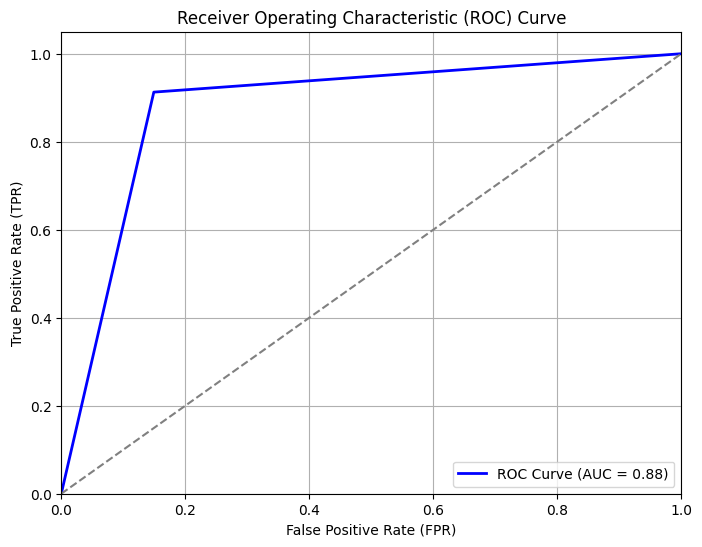

In [204]:
# رسم المنحنى
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # خط القاعدة العشوائي
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [218]:
from imblearn.over_sampling import SMOTE
# تطبيق SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [219]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
model.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [220]:
y_pred=model.predict(X_test)

In [221]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
accuracy = accuracy_score(y_test, y_pred)
confu_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test,y_pred)
print(f"Accuracy: {accuracy}")

print(f"Confusion matrix:{confu_matrix}")

print(class_report)

Accuracy: 0.9107266947586309
Confusion matrix:[[55691  3397]
 [ 2641  5906]]
              precision    recall  f1-score   support

           0       0.95      0.94      0.95     59088
           1       0.63      0.69      0.66      8547

    accuracy                           0.91     67635
   macro avg       0.79      0.82      0.81     67635
weighted avg       0.91      0.91      0.91     67635



In [222]:
# حساب معدل الحساسية (TPR) ومعدل الإنذارات الخاطئة (FPR)
fpr, tpr, _ = roc_curve(y_test, y_pred)

# حساب AUC (المنطقة تحت المنحنى)
roc_auc = auc(fpr, tpr)
print(f"📈 AUC Score: {roc_auc:.4f}")


📈 AUC Score: 0.8168


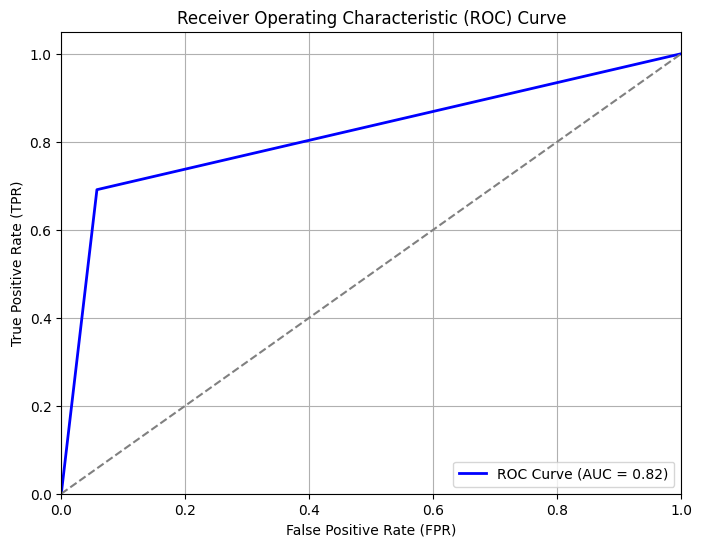

In [223]:
# رسم المنحنى
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # خط القاعدة العشوائي
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()